In [56]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.DataFrame({
    'Клиент id': [9002, 6722, 8799, 8737, 5208],
    'Пол': [1, 1, 1, 0, 0],
    'Благосостояние': ['medium', 'high', 'high', 'low', 'medium'],
    'Возраст': [63, 54, 62, 54, 37]
})

In [11]:
df = df.rename(columns={
    'Клиент id': 'client_id',
    'Пол': 'sex',
    'Благосостояние': 'wealth',
    'Возраст': 'age'
})
df.columns

Index(['client_id', 'sex', 'wealth', 'age'], dtype='object')

In [14]:
medium_35 = df[(df['wealth'] == 'medium') & (df['age'] > 35)]
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


In [16]:
df['older_than_30'] = df['age'] > 30
df.head()

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


In [25]:
unique_num = df.nunique()
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

In [30]:
df_2 = pd.DataFrame({
    'client_id': [5208, 9581, 7250, 8619, 6573],
    'amount': [42331, 88420, 1714, 80572, 57549],
    'date': [1585425830, 1585429536, 1585427761, 1585427077, 1585426290]
})
df_2

,client_id,amount,date
0,5208,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


In [32]:
full_data = df.merge(df_2, how='inner', on='client_id')
full_data

,client_id,sex,wealth,age,older_than_30,amount,date
0,5208,0,medium,37,True,42331,1585425830


In [33]:
def read_n_agg(path_to_file):
    df = pd.read_csv(path_to_file, sep=';')
    return df.groupby('company').agg({'income': 'mean'})

In [44]:
df = pd.read_csv('../../../data/01_module/03_part/peru_taxi_journeys_1m.csv', parse_dates=['end_at', 'start_at', 'arrived_at'], sep=',')

In [49]:
all_pickups, _ = df.shape

In [54]:
pickups_by_source = df.groupby('source', as_index=False) \
    .agg({'journey_id': 'count'}) \
    .rename(columns={'journey_id': 'pickups'}) \
    .sort_values(by='pickups', ascending=False)

pickups_by_source.pickups = round(pickups_by_source.pickups / all_pickups * 100, 2)

In [55]:
pickups_by_source

,source,pickups
0,app,59.97
3,website,20.01
1,call_center,15.04
2,street_booking,4.97


<Axes: xlabel='source', ylabel='pickups'>

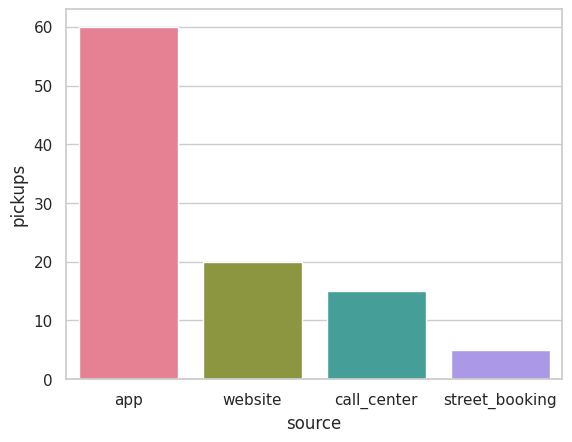

In [66]:
sns.barplot(pickups_by_source, x="source", y="pickups", palette="husl", hue='source', legend=False)

<Axes: xlabel='count', ylabel='source'>

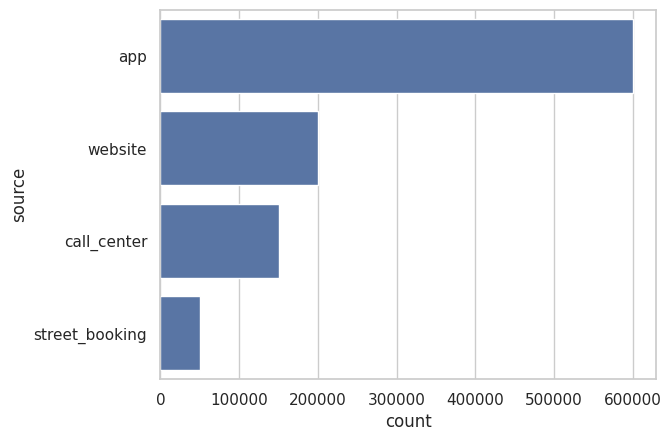

In [64]:
sns.countplot(df['source'])